In [143]:
import cv2
from cv2 import aruco
import numpy as np 
import os,sys
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)
parameters = aruco.DetectorParameters_create()
board = aruco.CharucoBoard_create(7, 5, 1, .8, aruco_dict)
ret,camera_matrix,dist,rvecs,tvecs = load_calib()
markerLength = 0.023

In [69]:
def load_calib(): 
    with open('/home/ausaf/Documents/aruco_hand/calib.pickle','rb') as f: 
        data = pickle.load(f)

    ret,camera_matrix,dist,rvecs,tvecs=data
    
    return  ret,camera_matrix,dist,rvecs,tvecs

def process(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    corners, ids, rejectedImgPoints = aruco.detectMarkers(
        gray,
        aruco_dict,
        parameters=parameters
    )

    output = aruco.drawDetectedMarkers(img, corners, ids)
    
    rvecs, tvecs, _= aruco.estimatePoseSingleMarkers(
        corners, markerLength, camera_matrix, dist)
    
    for i in range(len(rvecs)):
        aruco.drawAxis(output,camera_matrix,dist,rvecs[i],tvecs[i], markerLength)
    return output,rvec,tvec

In [72]:
def extract(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    corners, ids, rejectedImgPoints = aruco.detectMarkers(
        gray,
        aruco_dict,
        parameters=parameters
    )

    rotations, translations, _= aruco.estimatePoseSingleMarkers(
        corners, markerLength, camera_matrix, dist)
    if rotations is None: 
        return False
    return (corners,ids,rotations,translations)

In [101]:
CAP = '/home/ausaf/Documents/aruco_hand/vid/calib.mov'
cap = cv2.VideoCapture(CAP)

In [74]:
data = []
while True: 
    res, frame = cap.read()
    if not res: 
        print('Finished reading VideoCapture')
        break
    data.append(extract(frame))
    

Finished reading VideoCapture


In [ ]:
with open('/home/ausaf/Documents/aruco_hand/vid/calib.pose', 'wb') as f: 
    pickle.dump(data,f)

In [79]:
with open('/home/ausaf/Documents/aruco_hand/vid/calib.pose', 'rb') as f: 
    x = pickle.load(f)


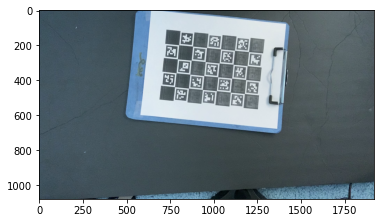

In [173]:
corners,ids,rotations,translations = data[0]
c = corners[0][0]
#     output = aruco.drawDetectedMarkers(img, corners, ids)
co = frame.copy()
# if rotations is not None: 
#     print('aa')
#     aruco.drawAxis(co,camera_matrix,dist,rotations[0],translations[0], markerLength)

plt.imshow(co)

In [169]:
corners[0][0][:,1]

array([550., 543., 480., 487.], dtype=float32)

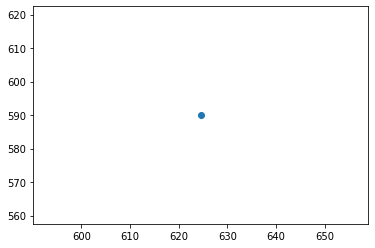

In [170]:
plt.plot([c[:, 0].mean()], [c[:, 1].mean()], "o", label = "id={0}".format(ids[i]))

array([[-0.17186181,  3.11970363, -0.21323374]])

<ipython-input-175-754693ef7543>:4: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.circle(co,(x,y),5,(255,0,0),3)


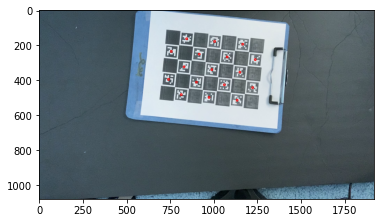

In [175]:
for i,c,r,t in zip(ids,corners,rotations,translations): 
    x = c[0][:,0].mean()
    y = c[0][:,1].mean()
    cv2.circle(co,(x,y),5,(255,0,0),3)
plt.imshow(co)